In [78]:
import pandas as pd
import numpy as np
import datetime as dt
import sklearn as sk
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import matthews_corrcoef
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [106]:
readmit_model2 = pd.read_csv(r'C:\Users\brthompson\bt_school\data\interim\secondmodel_readmit.csv')
#mort_model1 = pd.read_csv(r'C:\Users\brthompson\bt_school\data\interim\mort_model1.csv')

In [107]:
readmit_model2.head()

,Unnamed: 0,age,los,GENDER_F,GENDER_M,ADMISSION_TYPE_ELECTIVE,ADMISSION_TYPE_EMERGENCY,ADMISSION_TYPE_NEWBORN,ADMISSION_LOCATION_** INFO NOT AVAILABLE **,ADMISSION_LOCATION_CLINIC REFERRAL/PREMATURE,...,DIAGNOSIS_STROKE/TIA.1,DIAGNOSIS_STROKE;TELEMETRY;TRANSIENT ISCHEMIC ATTACK.1,DIAGNOSIS_SUBARACHNOID HEMATOMA.1,DIAGNOSIS_SUBARACHNOID HEMORRHAGE.1,DIAGNOSIS_TRAUMA.1,DIAGNOSIS_TYLENOL OVERDOSE.1,"DIAGNOSIS_URINARY TRACT INFECTION,PYELONEPHRITIS.1",readmit,VALUE,visitbyday
0,0,0.000000,4,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0.0,0.000000
1,1,76.575342,11,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,37.0,3.363636
2,2,47.876712,7,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,4.0,0.571429
3,3,0.000000,2,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0.0,0.000000
4,4,65.983562,16,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,39.0,2.437500


In [108]:
#Check balance - do not need to balance this dataset
readmit_model2['readmit'].value_counts()

0    43262
1    30244
Name: readmit, dtype: int64

In [56]:
#mort_model1.head()

,age,los,ADMISSION_TYPE_ELECTIVE,ADMISSION_TYPE_EMERGENCY,ADMISSION_TYPE_NEWBORN,ADMISSION_TYPE_URGENT,ADMISSION_LOCATION_** INFO NOT AVAILABLE **,ADMISSION_LOCATION_EMERGENCY ROOM ADMIT,ADMISSION_LOCATION_HMO REFERRAL/SICK,ADMISSION_LOCATION_PHYS REFERRAL/NORMAL DELI,...,DIAGNOSIS_SUBDURAL HEMATOMA.1,DIAGNOSIS_SYNCOPE;TELEMETRY.1,DIAGNOSIS_UNSTABLE ANGINA.1,DIAGNOSIS_UNSTABLE ANGINA\CATH.1,DIAGNOSIS_UPPER GI BLEED.1,DIAGNOSIS_UPPER GI BLEED;TELEMETRY.1,DIAGNOSIS_URINARY TRACT INFECTION.1,DIAGNOSIS_VOMITING.1,DIAGNOSIS_WEAKNESS.1,HOSPITAL_EXPIRE_FLAG
0,0.000000,4,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,76.575342,11,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,47.876712,7,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.000000,2,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,65.983562,16,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [109]:
#Start with readmit model since the data is already balanced
#Split dependent and independent variables
Xad = readmit_model2.drop(['readmit'], 1) #Features
Yad = readmit_model2['readmit'] #Target variable
Yad.shape

(73506,)

In [110]:
#Split the data into training and test, keep test set aside for testing of models. Will perform cross validation on training set
X_train,X_test,y_train,y_test=train_test_split(Xad,Yad,test_size=0.25,random_state=0)

In [111]:
logreg = LogisticRegressionCV(cv=5)

In [112]:
start_logreg = time.time()
logreg.fit(X_train,y_train)
elapsed_logreg = time.time() - start_time

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [113]:
elapsed_logreg

19515.40000128746

In [114]:
y_pred_logreg=logreg.predict(X_test)

In [115]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_logreg)
cnf_matrix

array([[8883, 2020],
       [2893, 4581]], dtype=int64)

In [116]:
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

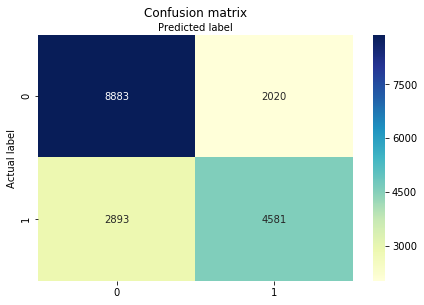

In [117]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [118]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_logreg))
print("Precision:",metrics.precision_score(y_test, y_pred_logreg))
print("Recall:",metrics.recall_score(y_test, y_pred_logreg))

Accuracy: 0.7326549491211841
Precision: 0.6939857597333737
Recall: 0.6129248059941129


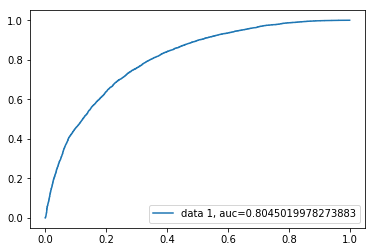

In [119]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [120]:
#Calculate Matthew's Correlation Coefficient (MCC)
matthews_corrcoef(y_test, y_pred_logreg)

0.4378637922623654

In [121]:
elapsed_logreg

19515.40000128746

In [122]:
#Now conduct decision tree model
#Use cross-validation for hyperparamter tuning - choose the best max_depth
depth = []
for i in range(3,20):

    clf = DecisionTreeClassifier(max_depth=i) 
    scores = cross_val_score(estimator=clf, X = X_test, y = y_test, cv = 5, n_jobs = 4)
    depth.append((i, scores.mean()))
print(depth)
  
#Optimum depth is 10

[(3, 0.7183972731928082), (4, 0.7343959857956438), (5, 0.7466936032586371), (6, 0.7474007900789215), (7, 0.7479992075057582), (8, 0.7513193206070613), (9, 0.7546943294020872), (10, 0.7560551846053623), (11, 0.7519736110015238), (12, 0.752680901405766), (13, 0.7533874220425042), (14, 0.7515910297017871), (15, 0.7505572677184045), (16, 0.7498505695149237), (17, 0.7462040294578657), (18, 0.744735204358766), (19, 0.7452788297564289)]


In [123]:
clf_tree = DecisionTreeClassifier(max_depth=10) 

In [124]:
# Performing training 
starttime_tree = time.time()
clf_tree.fit(X_train, y_train) 
elapsed_tree = time.time() - starttime_tree

In [125]:
elapsed_tree

1.0910000801086426

In [126]:
y_pred_tree = clf_tree.predict(X_test) 


In [127]:
metrics.confusion_matrix(y_test, y_pred_tree)

array([[8904, 1999],
       [2169, 5305]], dtype=int64)

In [128]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_tree))
print("Precision:",metrics.precision_score(y_test, y_pred_tree))
print("Recall:",metrics.recall_score(y_test, y_pred_tree))

Accuracy: 0.7731947543124558
Precision: 0.7263143483023001
Recall: 0.7097939523682097


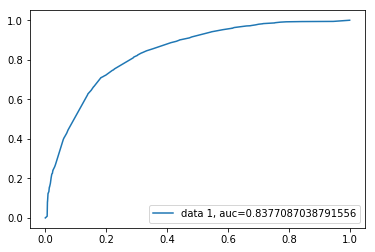

In [129]:
y_pred_proba = clf_tree.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [130]:
matthews_corrcoef(y_test, y_pred_tree)

0.5284374442547012

In [131]:
#now run random forest
clf_forest = RandomForestClassifier(n_estimators=100, criterion = 'entropy', min_samples_split = 10)

In [132]:
forest_start = time.time()
clf_forest.fit(X_train, y_train)
forest_elapsed = time.time() - forest_start

In [133]:
y_pred_forest = clf_forest.predict(X_test)

In [134]:
metrics.confusion_matrix(y_test, y_pred_forest)

array([[9271, 1632],
       [1964, 5510]], dtype=int64)

In [135]:
metrics.accuracy_score(y_test,y_pred_forest)*100

80.43206181640093

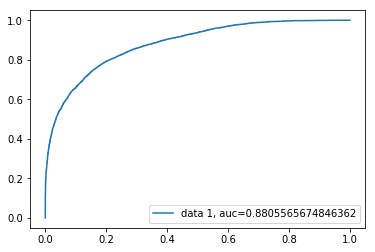

In [136]:
y_pred_proba = clf_forest.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [137]:
matthews_corrcoef(y_test, y_pred_forest)

0.5920926113394642